<a href="https://colab.research.google.com/github/PratikshaShetty5618/10DaysML/blob/master/Day6_Fashion_MNIST_Model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

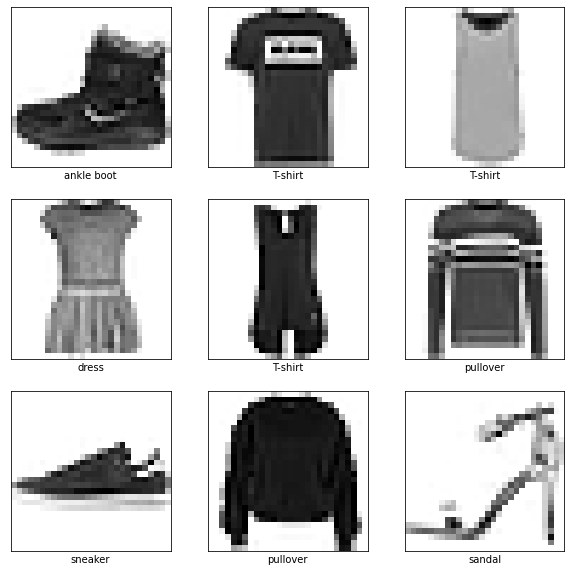

Epoch 1/10
1875/1875 - 32s - loss: 0.8927 - accuracy: 0.8451 - val_loss: 0.3498 - val_accuracy: 0.8754
Epoch 2/10
1875/1875 - 31s - loss: 0.2882 - accuracy: 0.8966 - val_loss: 0.3358 - val_accuracy: 0.8797
Epoch 3/10
1875/1875 - 32s - loss: 0.2504 - accuracy: 0.9100 - val_loss: 0.3165 - val_accuracy: 0.8929
Epoch 4/10
1875/1875 - 31s - loss: 0.2295 - accuracy: 0.9167 - val_loss: 0.3206 - val_accuracy: 0.8934
Epoch 5/10
1875/1875 - 32s - loss: 0.2149 - accuracy: 0.9209 - val_loss: 0.3334 - val_accuracy: 0.8887
Epoch 6/10
1875/1875 - 32s - loss: 0.1956 - accuracy: 0.9274 - val_loss: 0.3306 - val_accuracy: 0.8960
Epoch 7/10
1875/1875 - 31s - loss: 0.1788 - accuracy: 0.9334 - val_loss: 0.3595 - val_accuracy: 0.8934
Epoch 8/10
1875/1875 - 31s - loss: 0.1705 - accuracy: 0.9374 - val_loss: 0.3634 - val_accuracy: 0.8923
Epoch 9/10
1875/1875 - 32s - loss: 0.1508 - accuracy: 0.9450 - val_loss: 0.3926 - val_accuracy: 0.8969
Epoch 10/10
1875/1875 - 32s - loss: 0.1509 - accuracy: 0.9446 - val_loss:

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt

# get the data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets\
.fashion_mnist.load_data()

class_names = ['T-shirt', 'trousers', 'pullover', 'dress', 'coat',
               'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

# show the images
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# reshaping
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

# define the model
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
        ])
# sample output: [0, 0.1, 0, 0.2, 0.7, 0, 0, 0, 0, 0] --> coat
    
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", 
              metrics=['accuracy'])

# train
history = model.fit(train_images, train_labels, epochs=10,verbose=2, validation_data=(test_images, test_labels))
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print("Test accuracy: ", test_acc)

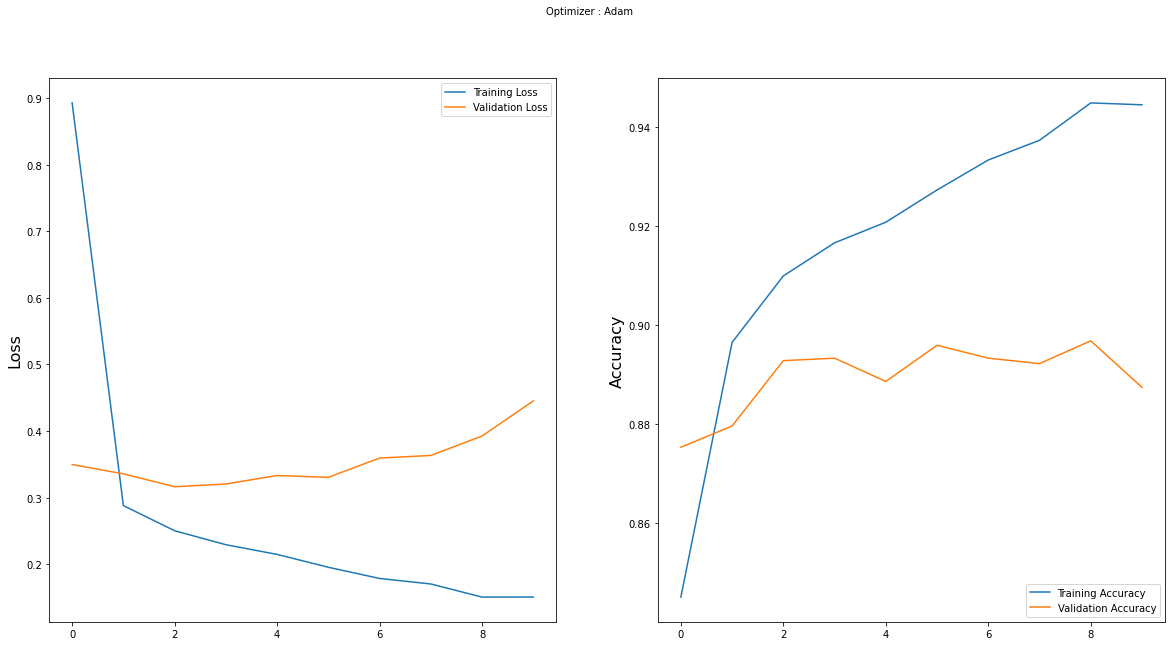

In [10]:
# plot the evolution of Loss and Acuracy on the train and validation sets

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

<Figure size 432x288 with 0 Axes>

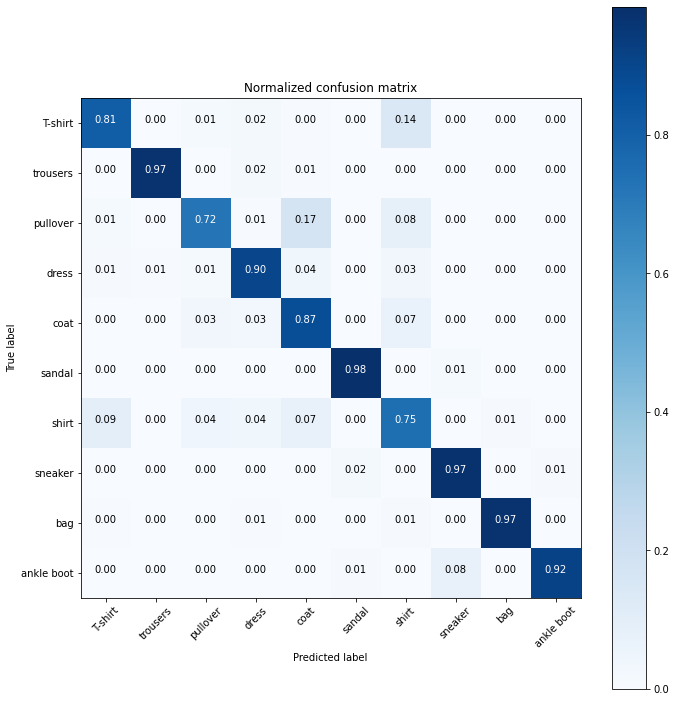

In [6]:
# show the confusion matrix of our predictions
import numpy as np
import matplotlib.pyplot as plt

# compute predictions
predictions = model.predict_generator(generator=test_images)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = test_labels
class_names = ['T-shirt', 'trousers', 'pullover', 'dress', 'coat',
               'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot'] 

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()